<a href="https://colab.research.google.com/github/catafest/colab_google/blob/master/catafest_029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today, I tested the first image from *NASA's James Webb Space Telescope* with simple methods from **opencv** and **matplotlib**.

You can find tre image here: https://www.jwst.nasa.gov/content/webbLaunch/deploymentExplorer.html#43


Import opencv and numpy python module.

In [130]:
import cv2
import numpy as np 
from google.colab.patches import cv2_imshow
from PIL import Image 
import matplotlib.pylab as plt

In [131]:
plt.rcParams["figure.figsize"] = (20,20)

**NOTE:** *If running on Brave Browser, i can confirm that turning down the shields, else you get error.*

In [132]:
from google.colab import files 
uploaded = files.upload() 
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  inputIMG=cv2.imread(fn)


Saving STSCI-J-p22035a-4000px.jpg to STSCI-J-p22035a-4000px.jpg
User uploaded file "STSCI-J-p22035a-4000px.jpg" with length 1900150 bytes


These source code will create a copy of the image and a grayscale image:

In [133]:
# Deep copy for results:
inputImageCopy = inputIMG.copy()

# Convert RGB to grayscale:
grayscaleImage = cv2.cvtColor(np.array(inputImageCopy),cv2.COLOR_BGR2GRAY)

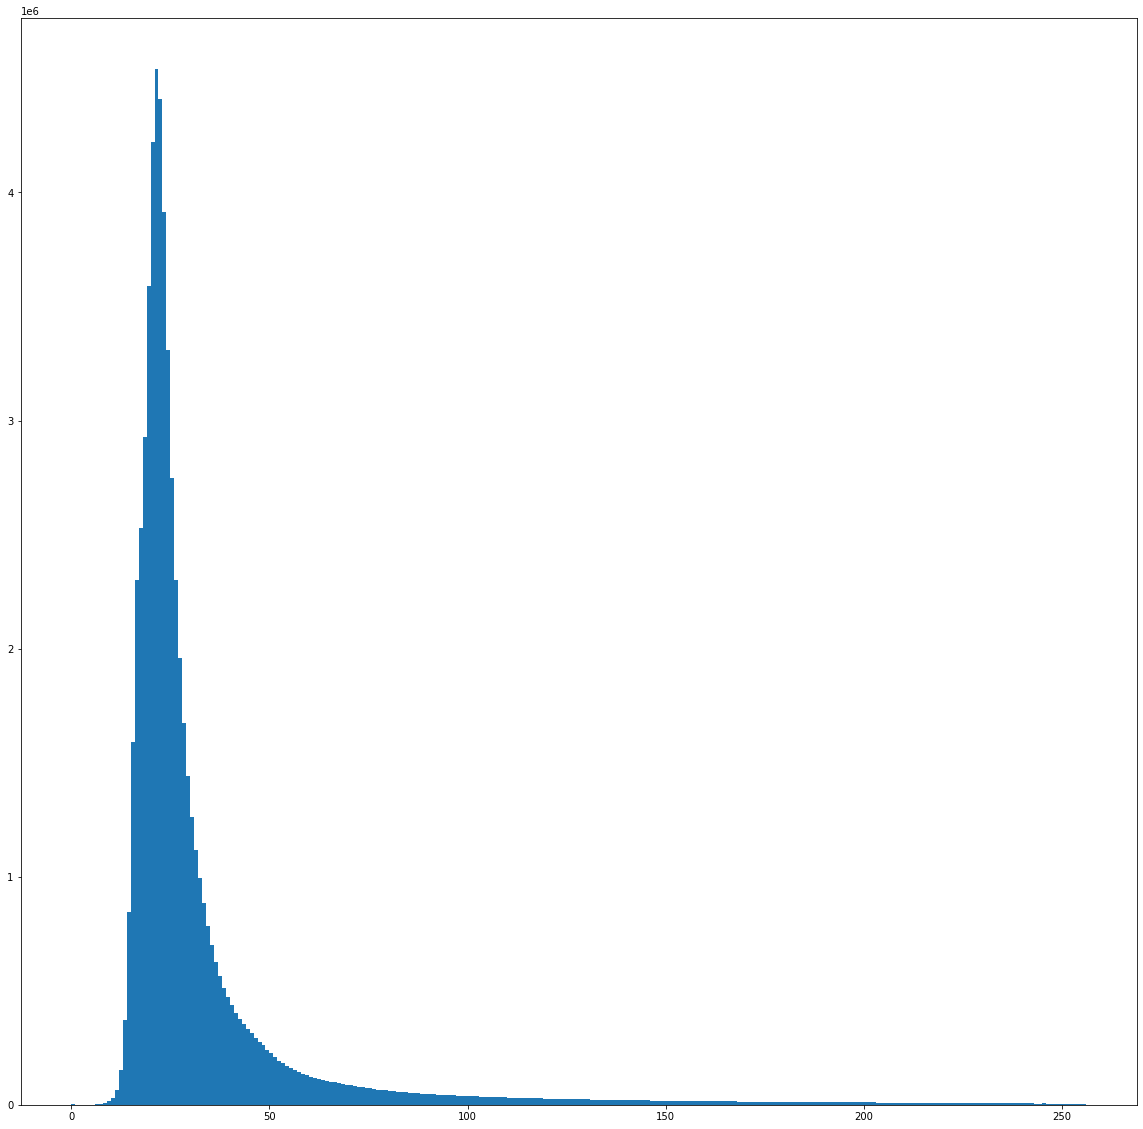

In [134]:
plt.hist(inputIMG.ravel(),bins = 256, range = [0,256]) 
plt.show()

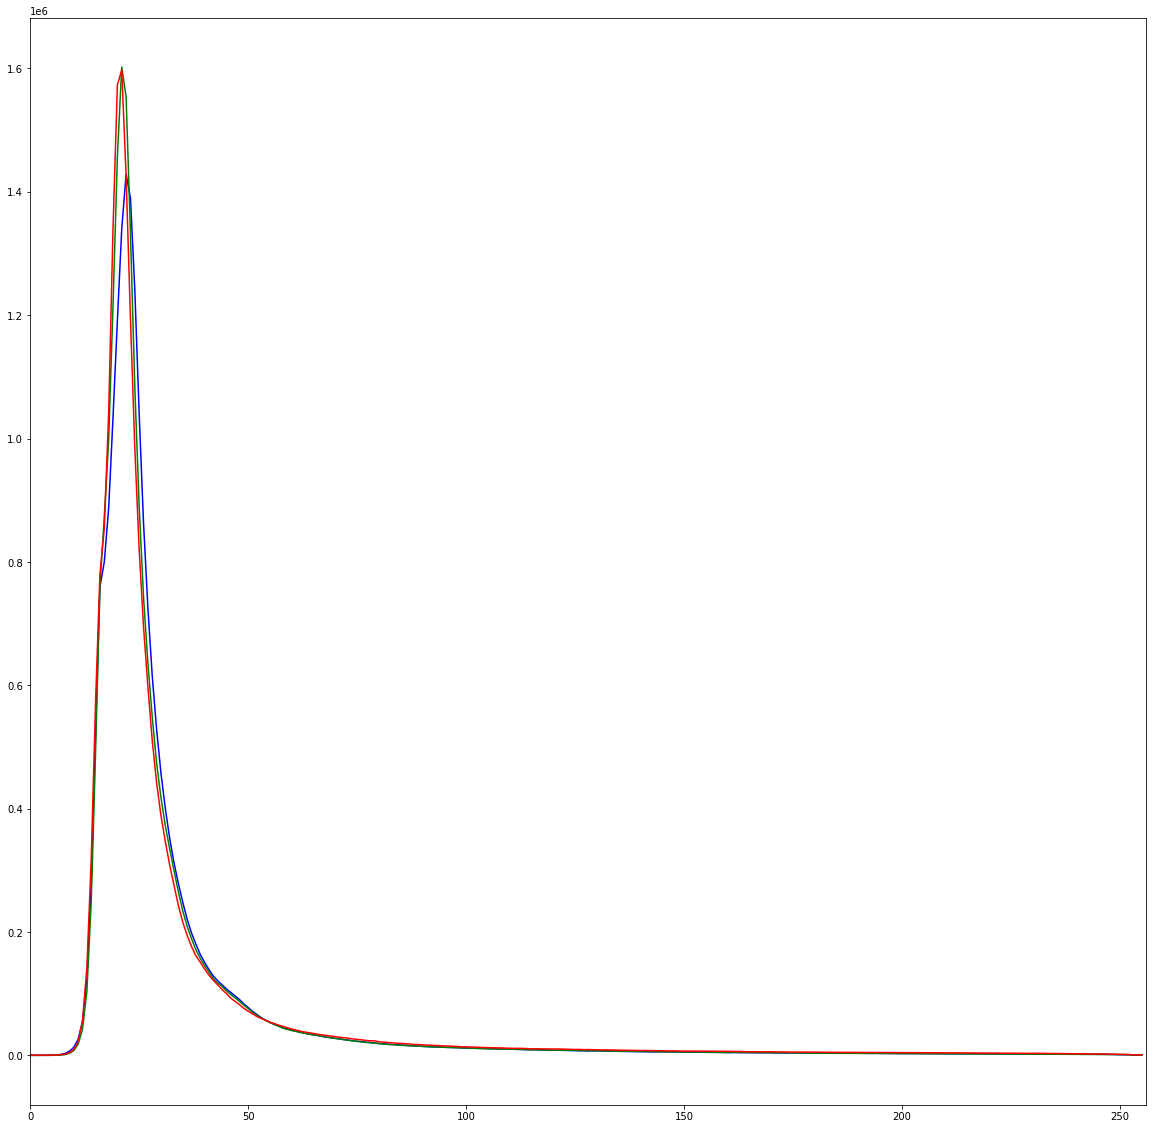

In [135]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([inputIMG],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


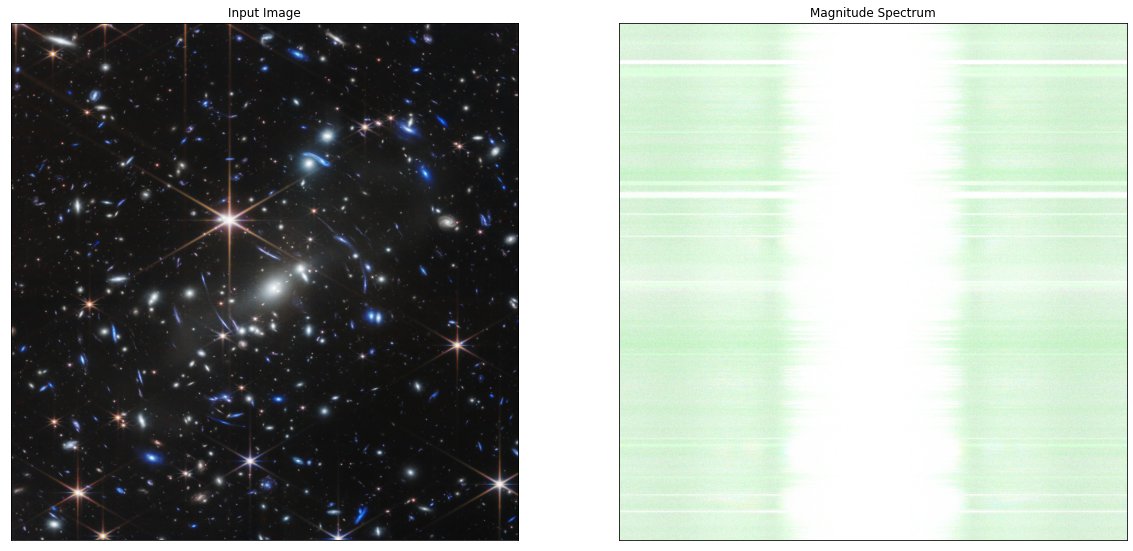

In [136]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv2.blur(inputImageCopy,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
# const function log 
n = 0.3
magnitude_spectrum = n * np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

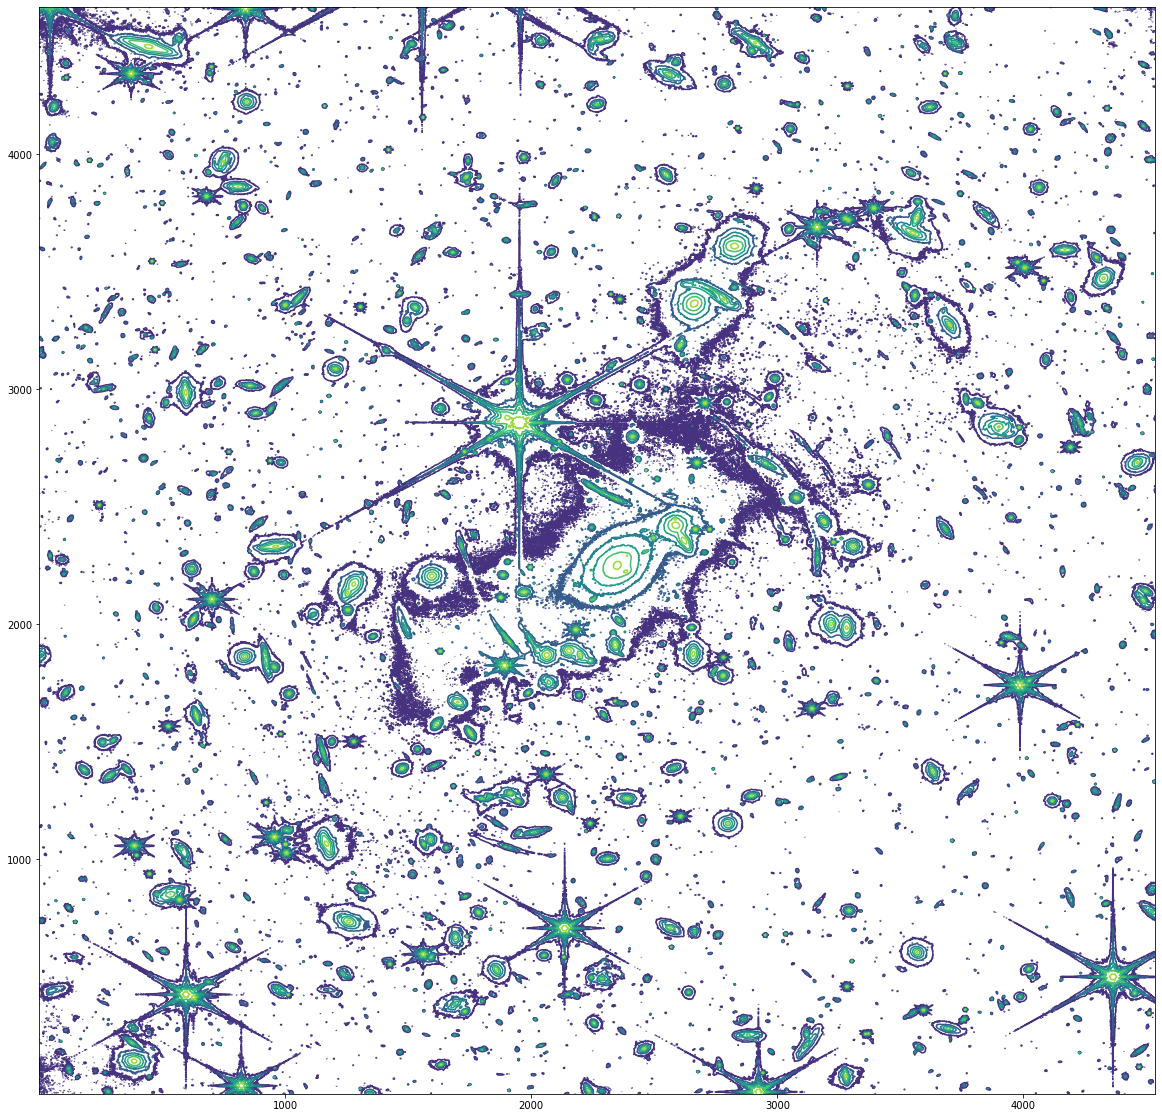

In [137]:
plt.contour(grayscaleImage, origin = "image")

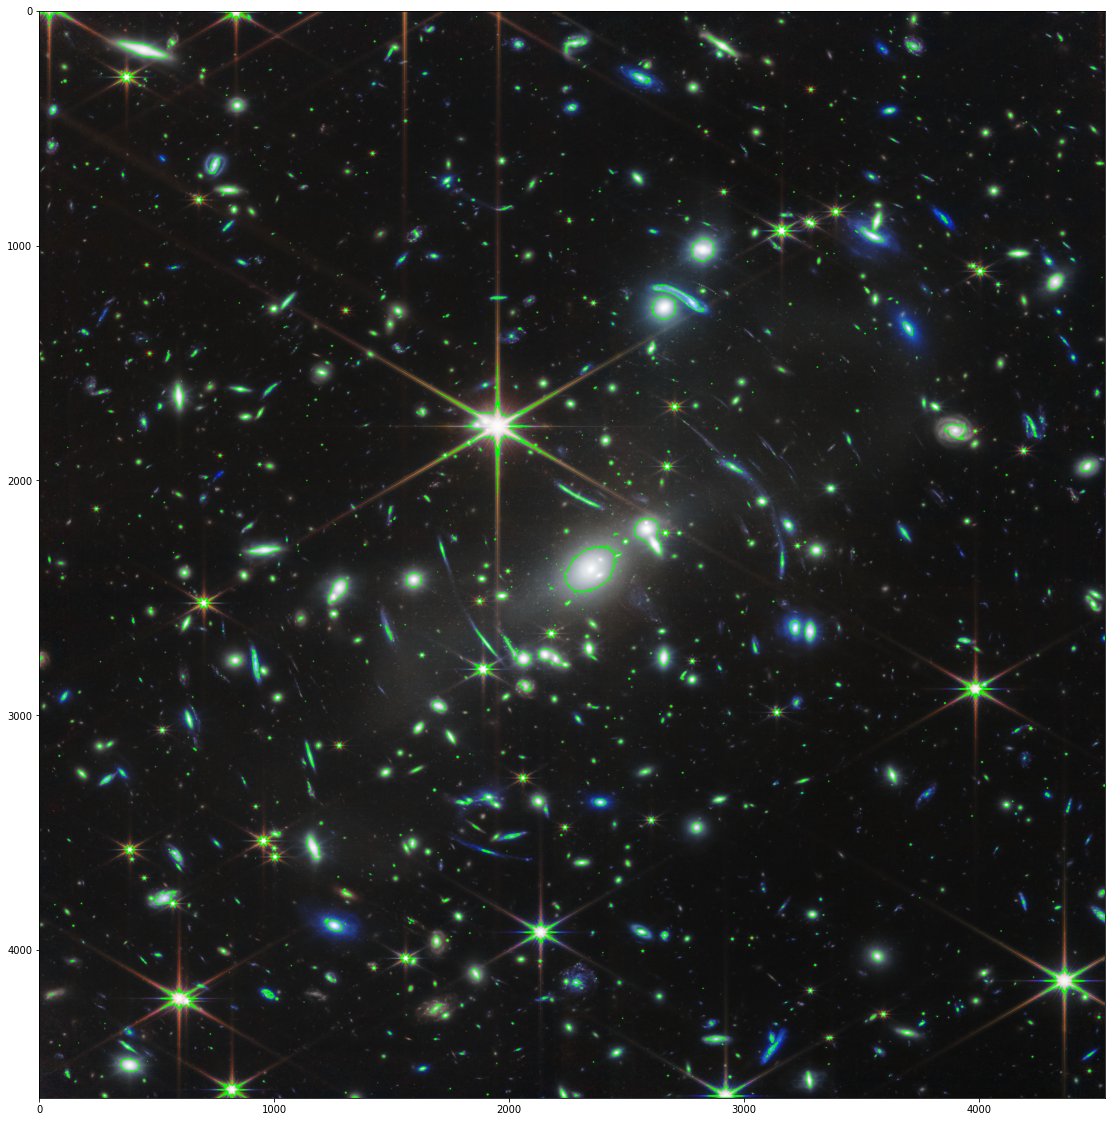

In [138]:
# Set threshold for the countour detection
ret, thresh = cv2.threshold(grayscaleImage,150,255,0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(inputIMG, contours, -1, (0, 255, 0), 3)
plt.imshow(inputIMG)

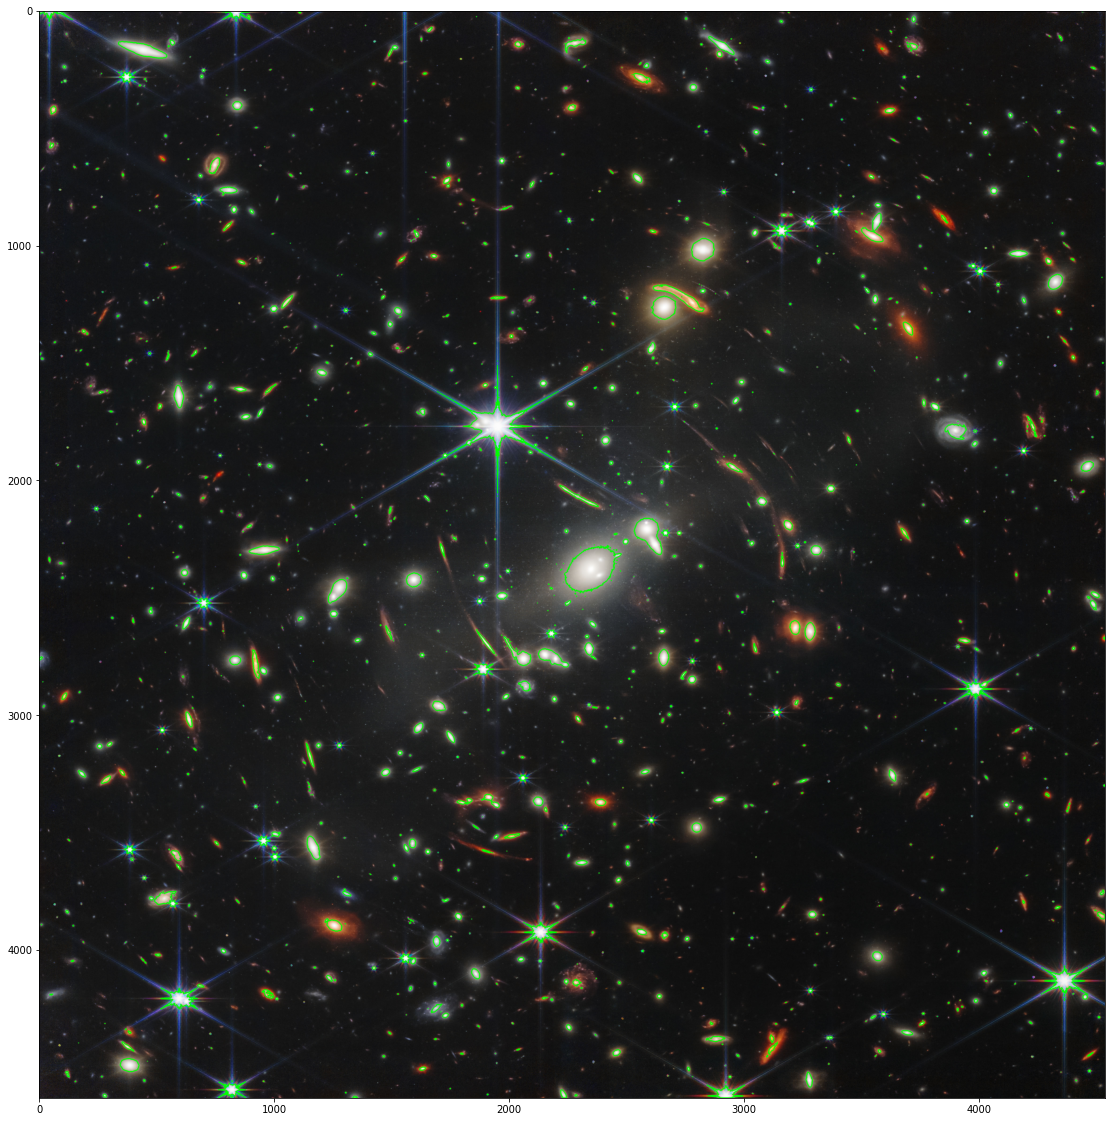

In [139]:
orbimg=inputIMG.copy()

orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(orbimg,None)
# compute the descriptors with ORB
kp, des = orb.compute(orbimg, kp)
# draw keypoints
cv2.drawKeypoints(orbimg,kp,orbimg)

plt.imshow(cv2.cvtColor(orbimg, cv2.COLOR_BGR2RGB))